![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://www.marbellaforsale.com/blog/wp-content/uploads/2018/07/used-property-prices-up-q2-2018.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# HOUSING PRICES

In this project, we will do an exploratory data analysis (EDA) and a model validation using the Mean Absolute Error (MAE) for several packs of Features selected by correlation, intuition, and field-knowledge.


The dataset was taken from Kaggle's Housing Prices Competition (Visit [Kaggle](https://www.kaggle.com)). It has 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. The objective is to predict the final price of each home.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 1- Exploratory Data Analysis (EDA)

### A- Loading libraries. Hands on!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### B- Loading our data:

As we saw on previous courses we can read data simply using Python.

In [5]:
home_data = pd.read_csv('train.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### C- A glance at the data:

In [6]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
home_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
home_data.shape

(1460, 81)

In [9]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data fields
Here's a brief description of what each colum means:

* SalePrice - the property's sale price in dollars. This is the target variable that we're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* BedroomAbvGr: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

### Column organizacion _for home_data.csv:_

Due to de number of columns, we have to pick (based on field knowledge and intuition) the ones we consider affect the most **SalePrice**. For that purpuse we can create three gruops of features, from more importance to less. After taking a glance, we can evaluate which features would be better to use to feed the model.

**1-** the first group of features would be compoused by 5 columns:
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet

* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad

* YearBuilt: Original construction date

In [11]:
feature_names_1 = ['1stFlrSF','2ndFlrSF','Neighborhood','Condition1','YearBuilt']

In [12]:
features1= home_data[feature_names_1]
features1

,1stFlrSF,2ndFlrSF,Neighborhood,Condition1,YearBuilt
0,856,854,CollgCr,Norm,2003
1,1262,0,Veenker,Feedr,1976
2,920,866,CollgCr,Norm,2001
3,961,756,Crawfor,Norm,1915
4,1145,1053,NoRidge,Norm,2000
...,...,...,...,...,...
1455,953,694,Gilbert,Norm,1999
1456,2073,0,NWAmes,Norm,1978
1457,1188,1152,Crawfor,Norm,1941
1458,1078,0,NAmes,Norm,1950


In [13]:
features1['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [14]:
features1['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

We can see this first group of features have two columns with categorital information: Neighborhood and Condition1. Neighborhood columns is compused by 25 categories, which would make it not convinient to encode. 

**2-** the second group of features would be compoused by 4 columns:
* OverallQual: Overall material and finish quality

* LotArea: Lot size in square feet
* TotalBsmtSF: Total square feet of basement area

* Utilities: Type of utilities available

In [15]:
feature_names_2 = ['OverallQual','LotArea','TotalBsmtSF','Utilities']

In [16]:
features2= home_data[feature_names_2]
features2

,OverallQual,LotArea,TotalBsmtSF,Utilities
0,7,8450,856,AllPub
1,6,9600,1262,AllPub
2,7,11250,920,AllPub
3,7,9550,756,AllPub
4,8,14260,1145,AllPub
...,...,...,...,...
1455,6,7917,953,AllPub
1456,6,13175,1542,AllPub
1457,7,9042,1152,AllPub
1458,5,9717,1078,AllPub


**3-** the thrid group of features would be compoused by 6 columns:
* GarageCars: Size of garage in car capacity

* BsmtFullBath: Basement full bathrooms
* FullBath: Full bathrooms above grade

* BedroomAbvGr: Number of bedrooms above basement level
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)


* PoolArea: Pool area in square feet

In [17]:
feature_names_3 = ['GarageCars', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'PoolArea']

In [18]:
features3 = home_data[feature_names_3]
features3

,GarageCars,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,PoolArea
0,2,1,2,3,8,0
1,2,0,2,3,6,0
2,2,1,2,3,6,0
3,3,1,1,3,7,0
4,3,1,2,4,9,0
...,...,...,...,...,...,...
1455,2,0,2,3,7,0
1456,2,1,2,3,7,0
1457,1,0,2,4,9,0
1458,1,1,1,2,5,0


After pulling out these three groups of features, we came to define two FINAL groups of features to do the evaluation. The first group will be called:
**_Central_features_** (compoused by 5 columns):
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet

* Condition1: Proximity to main road or railroad (this one requieres ONE HOT ENCODE)
* YearBuilt: Original construction date

* OverallQual: Overall material and finish quality

Then we have a more complete version:
**_Combined_features_** (adding 3 additional columns):
* LotArea: Lot size in square feet

* GarageCars: Size of garage in car capacity
* TotalFullbath: which is the sum of **_BsmtFullBath_** and **__FullBath__**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### D- Column wrangling and ordinal encoding:

Let's first create the column **TotalFullbath** by doing the sum of _BsmtFullBath_ and _FullBath_

In [19]:
home_dataF = home_data

In [20]:
home_dataF['TotalFullbath'] = home_dataF['BsmtFullBath']+home_dataF['FullBath']
home_dataF['TotalFullbath']

0       3
1       2
2       3
3       2
4       3
       ..
1455    2
1456    3
1457    2
1458    2
1459    2
Name: TotalFullbath, Length: 1460, dtype: int64

Let's do a quick check:

In [21]:
home_dataF['BsmtFullBath']

0       1
1       0
2       1
3       1
4       1
       ..
1455    0
1456    1
1457    0
1458    1
1459    1
Name: BsmtFullBath, Length: 1460, dtype: int64

In [22]:
home_dataF['FullBath']

0       2
1       2
2       2
3       1
4       2
       ..
1455    2
1456    2
1457    2
1458    1
1459    1
Name: FullBath, Length: 1460, dtype: int64

ok, we can notice that there is matematical consistency on the column **TotalFullbath**. Now, let's ordinal encode the column Condition1, 

Now, just as an exercise let's do the list of all of the categorical colums in **home_dataF**

In [23]:
# Get list of categorical variables
s = (home_dataF.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Now, let's break down the code above:

In [24]:
home_dataF.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
TotalFullbath      int64
Length: 82, dtype: object

In [25]:
s

Id               False
MSSubClass       False
MSZoning          True
LotFrontage      False
LotArea          False
                 ...  
YrSold           False
SaleType          True
SaleCondition     True
SalePrice        False
TotalFullbath    False
Length: 82, dtype: bool

In [26]:
s[s]

MSZoning         True
Street           True
Alley            True
LotShape         True
LandContour      True
Utilities        True
LotConfig        True
LandSlope        True
Neighborhood     True
Condition1       True
Condition2       True
BldgType         True
HouseStyle       True
RoofStyle        True
RoofMatl         True
Exterior1st      True
Exterior2nd      True
MasVnrType       True
ExterQual        True
ExterCond        True
Foundation       True
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinType2     True
Heating          True
HeatingQC        True
CentralAir       True
Electrical       True
KitchenQual      True
Functional       True
FireplaceQu      True
GarageType       True
GarageFinish     True
GarageQual       True
GarageCond       True
PavedDrive       True
PoolQC           True
Fence            True
MiscFeature      True
SaleType         True
SaleCondition    True
dtype: bool

In [27]:
s[s].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Now, let's do the ordinal encode by wraggling columns, and then with the sklearn library.
For manual ordinal encode (wraggling columns), since there is a ranking on frecuency in the categories, we will assign the values of the encoded in the following order:

* Norm      1260 (9)
* Feedr       81 (8)
* Artery      48 (7)
* RRAn        26 (6)
* PosN        19 (5)
* RRAe        11 (4)
* PosA         8 (3)
* RRNn         5 (2)
* RRNe         2 (1)

In [28]:
home_dataF['Condition1N'] = (
    np.select(
        condlist = [home_dataF['Condition1'] == 'RRNe', home_dataF['Condition1'] == 'RRNn', home_dataF['Condition1'] == 'PosA', home_dataF['Condition1'] == 'RRAe', home_dataF['Condition1'] == 'PosN', home_dataF['Condition1'] == 'RRAn', home_dataF['Condition1'] == 'Artery', home_dataF['Condition1'] == 'Feedr'],
        choicelist=[1,2,3,4,5,6,7,8],
        default=[9]))
home_dataF

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFullbath,Condition1N
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,3,9
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,2,8
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,3,9
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,2,9
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,175000,2,9
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,2,2010,WD,Normal,210000,3,9
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,Shed,2500,5,2010,WD,Normal,266500,2,9
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2010,WD,Normal,142125,2,9


In [29]:
home_dataF['Condition1N'].describe()

count    1460.000000
mean        8.667808
std         1.042578
min         1.000000
25%         9.000000
50%         9.000000
75%         9.000000
max         9.000000
Name: Condition1N, dtype: float64

In [30]:
home_dataF['Condition1N']

0       9
1       8
2       9
3       9
4       9
       ..
1455    9
1456    9
1457    9
1458    9
1459    9
Name: Condition1N, Length: 1460, dtype: int32

<AxesSubplot:>

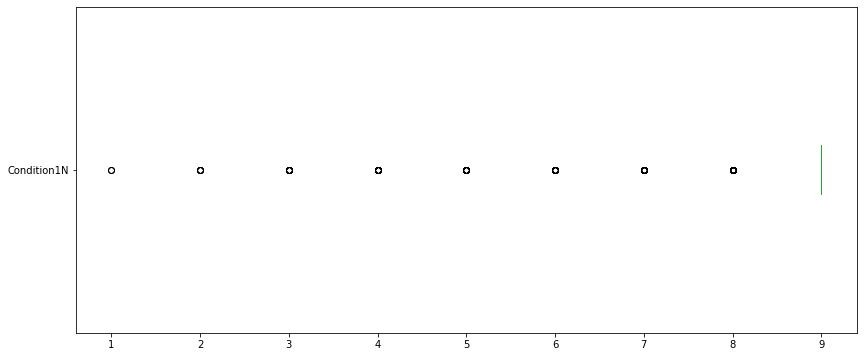

In [31]:
home_dataF['Condition1N'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

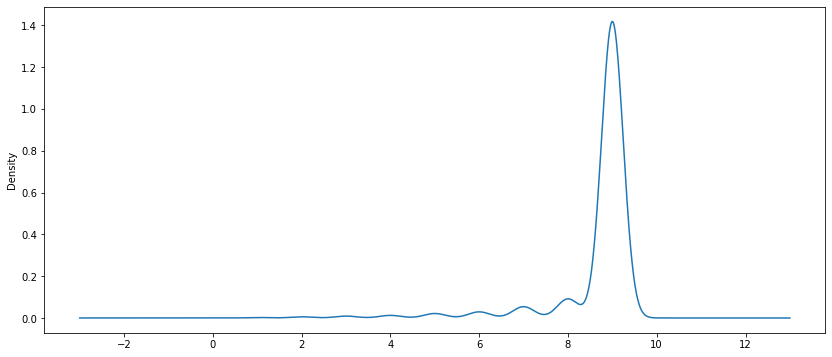

In [32]:
home_dataF['Condition1N'].plot(kind='density', figsize=(14,6))

Ok, the manual ordinal encoding looks excellent, now let's do the same encoding with the sklearn library:

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
features1= home_data[feature_names_1]
features1

,1stFlrSF,2ndFlrSF,Neighborhood,Condition1,YearBuilt
0,856,854,CollgCr,Norm,2003
1,1262,0,Veenker,Feedr,1976
2,920,866,CollgCr,Norm,2001
3,961,756,Crawfor,Norm,1915
4,1145,1053,NoRidge,Norm,2000
...,...,...,...,...,...
1455,953,694,Gilbert,Norm,1999
1456,2073,0,NWAmes,Norm,1978
1457,1188,1152,Crawfor,Norm,1941
1458,1078,0,NAmes,Norm,1950


In [35]:
# Make copy to avoid changing original data 
label_features1 = features1.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_features1 = ordinal_encoder.fit_transform(label_features1)
label_features1

array([[134., 232.,   5.,   2., 104.],
       [427.,   0.,  24.,   1.,  77.],
       [178., 239.,   5.,   2., 102.],
       ...,
       [378., 354.,   6.,   2.,  44.],
       [296.,   0.,  12.,   2.,  51.],
       [423.,   0.,   7.,   2.,  66.]])

As we can see, the encoding with the sklearing library does not show the influence of frecuency in the categories, for that reason we will pick the manual encoding.

ok, now, we can build the two FINAL groups of features to do the model evaluation: **central_features** and **combined_features** :

In [36]:
central_features_names = ['1stFlrSF','2ndFlrSF','Condition1N','YearBuilt','OverallQual']
central_features = home_dataF[central_features_names]
central_features

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual
0,856,854,9,2003,7
1,1262,0,8,1976,6
2,920,866,9,2001,7
3,961,756,9,1915,7
4,1145,1053,9,2000,8
...,...,...,...,...,...
1455,953,694,9,1999,6
1456,2073,0,9,1978,6
1457,1188,1152,9,1941,7
1458,1078,0,9,1950,5


In [37]:
combined_features_names = ['1stFlrSF','2ndFlrSF','Condition1N','YearBuilt','OverallQual','LotArea','GarageCars', 'TotalFullbath']
combined_features = home_dataF[combined_features_names]
combined_features

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual,LotArea,GarageCars,TotalFullbath
0,856,854,9,2003,7,8450,2,3
1,1262,0,8,1976,6,9600,2,2
2,920,866,9,2001,7,11250,2,3
3,961,756,9,1915,7,9550,3,2
4,1145,1053,9,2000,8,14260,3,3
...,...,...,...,...,...,...,...,...
1455,953,694,9,1999,6,7917,2,2
1456,2073,0,9,1978,6,13175,2,3
1457,1188,1152,9,1941,7,9042,1,2
1458,1078,0,9,1950,5,9717,1,2


In [38]:
combined_features.describe()

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual,LotArea,GarageCars,TotalFullbath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,8.667808,1971.267808,6.099315,10516.828082,1.767123,1.990411
std,386.587738,436.528436,1.042578,30.202904,1.382997,9981.264932,0.747315,0.732046
min,334.000000,0.000000,1.000000,1872.000000,1.000000,1300.000000,0.000000,0.000000
25%,882.000000,0.000000,9.000000,1954.000000,5.000000,7553.500000,1.000000,1.000000
50%,1087.000000,0.000000,9.000000,1973.000000,6.000000,9478.500000,2.000000,2.000000
75%,1391.250000,728.000000,9.000000,2000.000000,7.000000,11601.500000,2.000000,2.000000
max,4692.000000,2065.000000,9.000000,2010.000000,10.000000,215245.000000,4.000000,6.000000


Let's remember the name of each column:
**_Central_features_** (compoused by 5 columns):
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet

* Condition1N: Proximity to main road or railroad (already ENCODED)
* YearBuilt: Original construction date

* OverallQual: Overall material and finish quality

Then we have a more complete version:
**_Combined_features_** (adding 3 additional columns):
* LotArea: Lot size in square feet
* GarageCars: Size of garage in car capacity
* TotalFullbath: which is the sum of **_BsmtFullBath_** and **__FullBath__**

### Column organizacion for _combined_features_:

_1- Column distribution:_

**TIME-data** is provided through **1** column (YearBuilt)

**LOCATION-data** is provided through **1** column (Condition1N:  Proximity to main road or railroad)

**SIZE-data** is provided in two groups:
Area-data. Provided through **3** columns (1stFlrSF, 2ndFlrSF,LotArea)
Size-indirect data. Provided through **2** columns (GarageCars,TotalFullbath)

**Quality-data** is provided through **1** column (OverallQual)

For a total of **8** columns and **1460** houses.

_2- Column ranges/organization:_

**TIME-data** ranges from 1872 to 2010

**LOCATION-data** offers 9 categories already encoded.

**SIZE-data** :
in Area-data, 1stFlrSF ranges from 334 to 4692, 2ndFlrSF ranges from 0 to 2065, and LotArea ranges from 1300 to 215245.
in Size-indirect data, GarageCars ranges from 0 to 4,and TotalFullbath ranges from 0 to 6.

**Quality-data** qualify the houses from 1 to 10.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### E- Analysis and visualization:
Just for data analysis purposes and correlation, let's create the dataframe **corr_features**, by adding the column **SalePrice** to the **combined_features**: 

In [39]:
corr_features_names = ['1stFlrSF','2ndFlrSF','Condition1N','YearBuilt','OverallQual','LotArea','GarageCars', 'TotalFullbath', 'SalePrice']
corr_features = home_dataF[corr_features_names]
corr_features

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual,LotArea,GarageCars,TotalFullbath,SalePrice
0,856,854,9,2003,7,8450,2,3,208500
1,1262,0,8,1976,6,9600,2,2,181500
2,920,866,9,2001,7,11250,2,3,223500
3,961,756,9,1915,7,9550,3,2,140000
4,1145,1053,9,2000,8,14260,3,3,250000
...,...,...,...,...,...,...,...,...,...
1455,953,694,9,1999,6,7917,2,2,175000
1456,2073,0,9,1978,6,13175,2,3,210000
1457,1188,1152,9,1941,7,9042,1,2,266500
1458,1078,0,9,1950,5,9717,1,2,142125


#### D.1. Numerical analysis and visualization

##### D.1.1 Let's do a quick visualization of all the series:

In [40]:
corr_features.describe()

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual,LotArea,GarageCars,TotalFullbath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,8.667808,1971.267808,6.099315,10516.828082,1.767123,1.990411,180921.195890
std,386.587738,436.528436,1.042578,30.202904,1.382997,9981.264932,0.747315,0.732046,79442.502883
min,334.000000,0.000000,1.000000,1872.000000,1.000000,1300.000000,0.000000,0.000000,34900.000000
25%,882.000000,0.000000,9.000000,1954.000000,5.000000,7553.500000,1.000000,1.000000,129975.000000
50%,1087.000000,0.000000,9.000000,1973.000000,6.000000,9478.500000,2.000000,2.000000,163000.000000
75%,1391.250000,728.000000,9.000000,2000.000000,7.000000,11601.500000,2.000000,2.000000,214000.000000
max,4692.000000,2065.000000,9.000000,2010.000000,10.000000,215245.000000,4.000000,6.000000,755000.000000


1stFlrSF            AxesSubplot(0.125,0.657941;0.227941x0.222059)
2ndFlrSF         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Condition1N      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
YearBuilt           AxesSubplot(0.125,0.391471;0.227941x0.222059)
OverallQual      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
LotArea          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
GarageCars             AxesSubplot(0.125,0.125;0.227941x0.222059)
TotalFullbath       AxesSubplot(0.398529,0.125;0.227941x0.222059)
SalePrice           AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

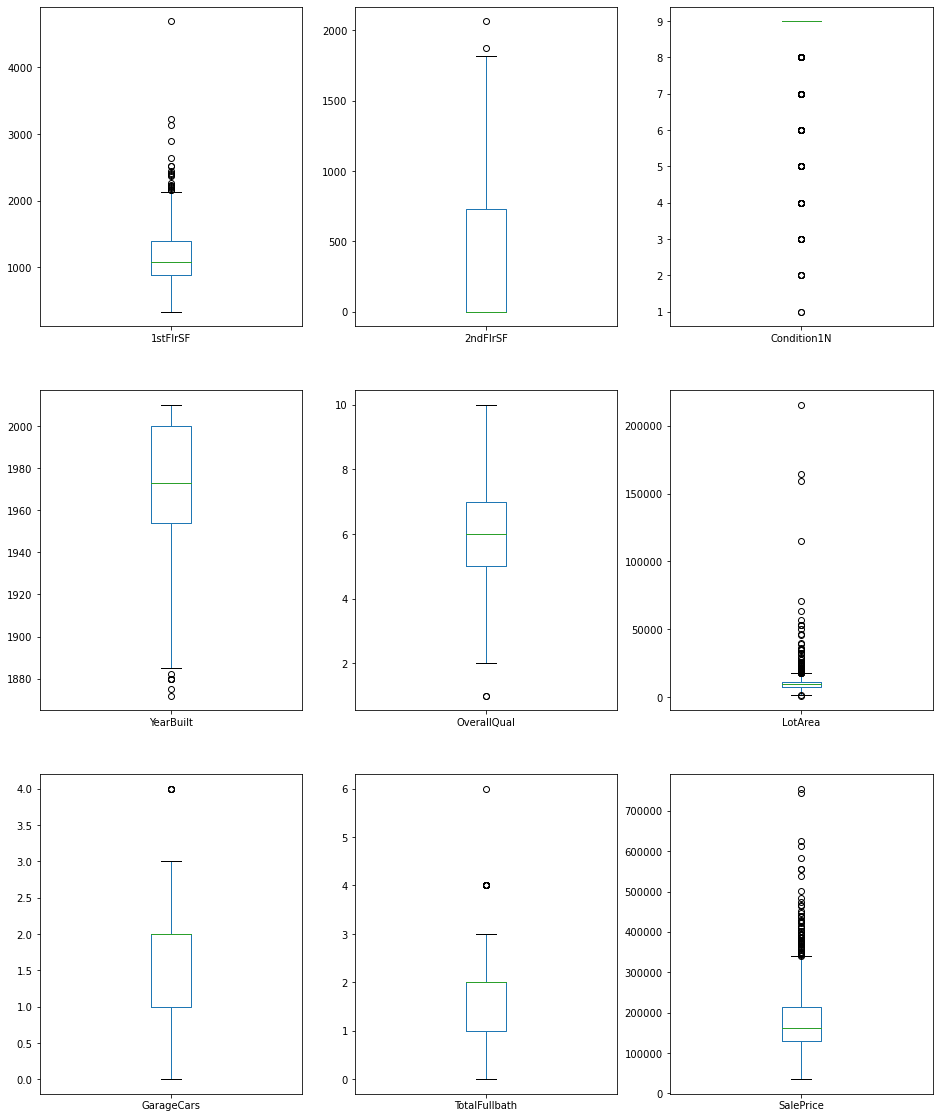

In [41]:
corr_features.plot(kind='box', subplots=True, layout=(3,3), figsize=(16,20))

* 50% of  1stFlrSF(First Floor square feet) are between 882 and 1391 ft2, the value 4692 ft2 is completele out of normal.

* 50% of 2ndFlrSF are betweeen 0 and 728ft2

* Most of values of Condition1N correspond to category 1.

* 50% of the house weere build between 1954 and 2000, there are some exteme cases where the houses were build around 1880.

* 50% of the OverallQual of the house is between 5 and 7, out of 10.

* 50% of The LotArea is between 7553 and 11601, having extreme values as 215245.
* 50% of GarageCars and TotalFullbath is between 1 and 2 vehicles.
* and 50% of SalePrice is between 129975 and 214000.

In [42]:
corr_features.describe()

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual,LotArea,GarageCars,TotalFullbath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,8.667808,1971.267808,6.099315,10516.828082,1.767123,1.990411,180921.195890
std,386.587738,436.528436,1.042578,30.202904,1.382997,9981.264932,0.747315,0.732046,79442.502883
min,334.000000,0.000000,1.000000,1872.000000,1.000000,1300.000000,0.000000,0.000000,34900.000000
25%,882.000000,0.000000,9.000000,1954.000000,5.000000,7553.500000,1.000000,1.000000,129975.000000
50%,1087.000000,0.000000,9.000000,1973.000000,6.000000,9478.500000,2.000000,2.000000,163000.000000
75%,1391.250000,728.000000,9.000000,2000.000000,7.000000,11601.500000,2.000000,2.000000,214000.000000
max,4692.000000,2065.000000,9.000000,2010.000000,10.000000,215245.000000,4.000000,6.000000,755000.000000


##### D.1.2 Let's pick two of the series to make a deeper analysis

We'll analyze the _'LotArea'_ column:

In [43]:
corr_features['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [44]:
corr_features['LotArea'].mean()

10516.828082191782

In [45]:
corr_features['LotArea'].median()

9478.5

_**BOX Diagram**_

<AxesSubplot:>

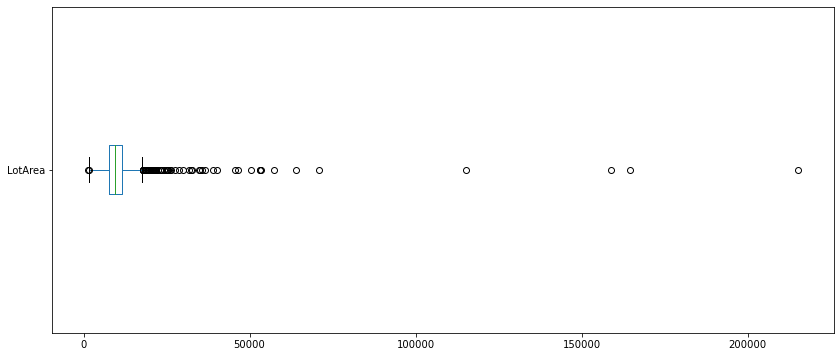

In [46]:
corr_features['LotArea'].plot(kind='box', vert=False, figsize=(14,6))

_**(DENSITY + mean + median) diagram:**_

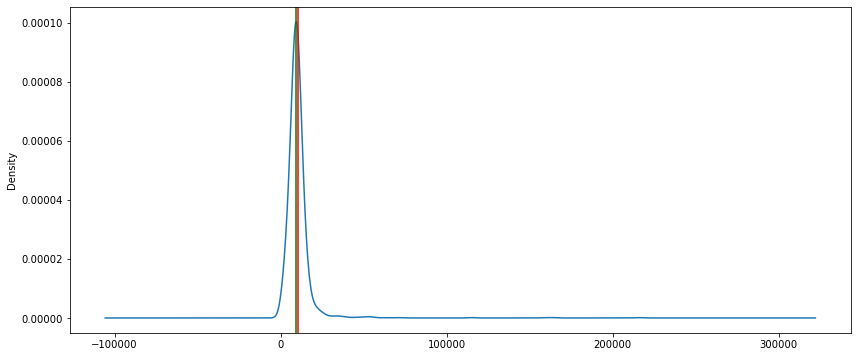

In [47]:
ax = corr_features['LotArea'].plot(kind='density', figsize=(14,6))
ax.axvline(corr_features['LotArea'].mean(), color='red')
ax.axvline(corr_features['LotArea'].median(), color='green')

_**HISTOGRAM diagram:**_

Text(0.5, 0, 'Area (ft2)')

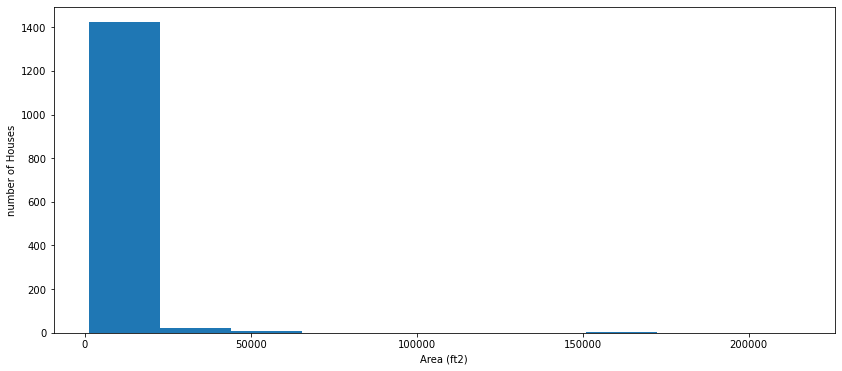

In [48]:
ax = corr_features['LotArea'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('number of Houses')
ax.set_xlabel('Area (ft2)')

Let's analyze the _'SalePrice'_ column:

In [49]:
corr_features['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [50]:
corr_features['SalePrice'].mean()

180921.19589041095

In [51]:
corr_features['SalePrice'].median()

163000.0

_**BOX Diagram**_

<AxesSubplot:>

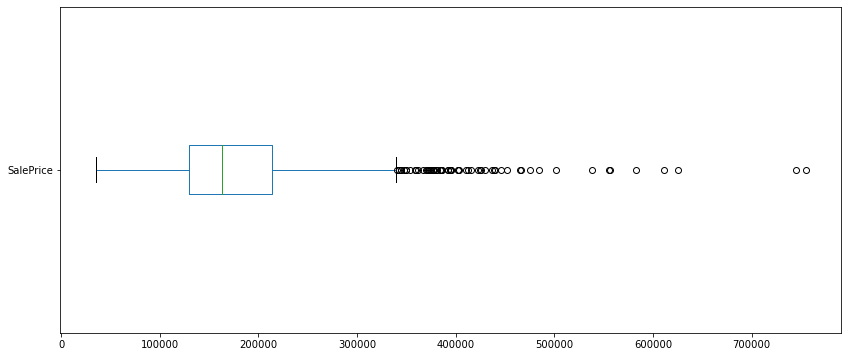

In [52]:
corr_features['SalePrice'].plot(kind='box', vert=False, figsize=(14,6))

_**(DENSITY + mean + median) diagram:**_

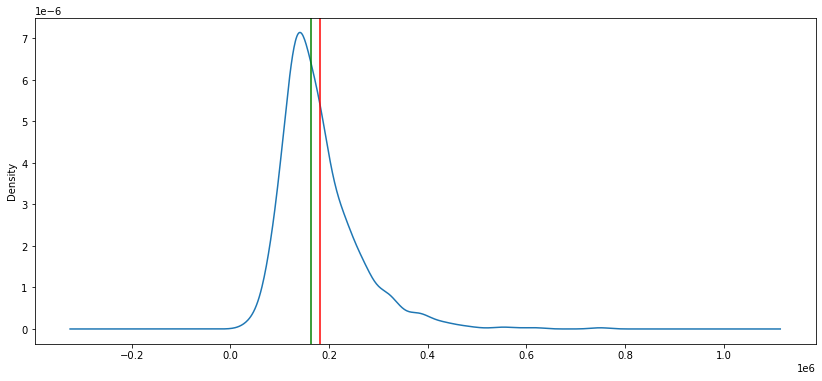

In [53]:
ax = corr_features['SalePrice'].plot(kind='density', figsize=(14,6))
ax.axvline(corr_features['SalePrice'].mean(), color='red')
ax.axvline(corr_features['SalePrice'].median(), color='green')

_**HISTOGRAM diagram:**_

Text(0.5, 0, 'Sale Price (dollars)')

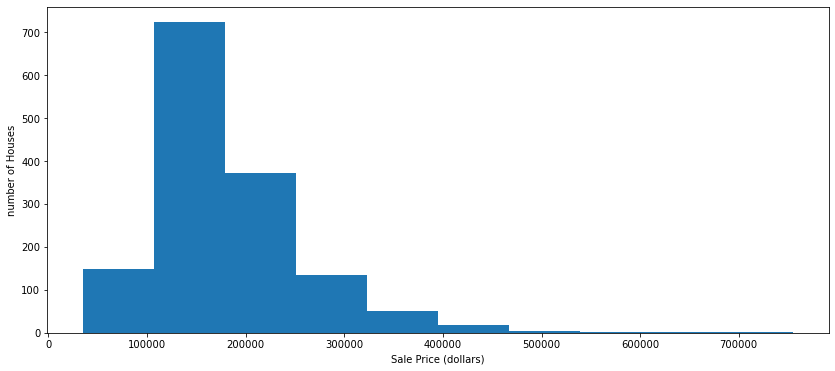

In [54]:
ax = corr_features['SalePrice'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('number of Houses')
ax.set_xlabel('Sale Price (dollars)')

CONCLUSION:
* In both cases, though we see extreme cases, those extreme cases represent a very little percentage of the info.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### F- Relationship between the columns:

Can we find any significant relationship?

In [55]:
corr = corr_features.corr(method='pearson')
corr

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual,LotArea,GarageCars,TotalFullbath,SalePrice
1stFlrSF,1.000000,-0.202646,-0.053186,0.281986,0.476224,0.299475,0.439317,0.459891,0.605852
2ndFlrSF,-0.202646,1.000000,-0.053139,0.010308,0.295493,0.050986,0.183926,0.196971,0.319334
Condition1N,-0.053186,-0.053139,1.000000,0.083363,0.010538,-0.035510,-0.013147,-0.021239,0.029464
YearBuilt,0.281986,0.010308,0.083363,1.000000,0.572323,0.014228,0.537850,0.485386,0.522897
OverallQual,0.476224,0.295493,0.010538,0.572323,1.000000,0.105806,0.600671,0.493116,0.790982
LotArea,0.299475,0.050986,-0.035510,0.014228,0.105806,1.000000,0.154871,0.206955,0.263843
GarageCars,0.439317,0.183926,-0.013147,0.537850,0.600671,0.154871,1.000000,0.446945,0.640409
TotalFullbath,0.459891,0.196971,-0.021239,0.485386,0.493116,0.206955,0.446945,1.000000,0.582934
SalePrice,0.605852,0.319334,0.029464,0.522897,0.790982,0.263843,0.640409,0.582934,1.000000


_**CORRELATION MAP:**_

<AxesSubplot:>

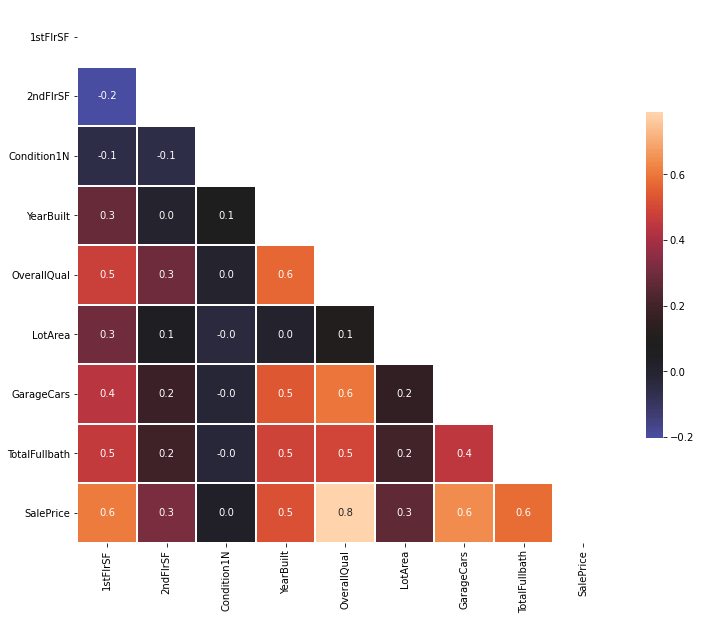

In [56]:
mask = np.triu(corr)
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, linewidths=1, annot = True, square = True, mask=mask, fmt='0.1f', center=0.08, cbar_kws={'shrink':0.5})

_**SCATTER PLOT (SalePrice Vs 1stFlrSF)**_

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

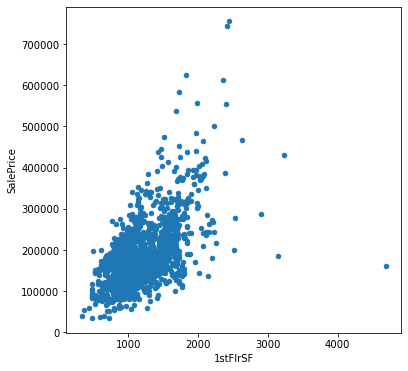

In [57]:
corr_features.plot(kind='scatter', x='1stFlrSF', y='SalePrice', figsize=(6,6))

_**SCATTER PLOT (SalePrice Vs 2ndFlrSF)**_

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

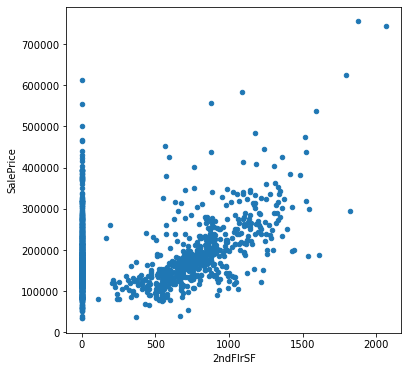

In [58]:
corr_features.plot(kind='scatter', x='2ndFlrSF', y='SalePrice', figsize=(6,6))

_**SCATTER PLOT (SalePrice Vs Condition1N)**_

<AxesSubplot:xlabel='Condition1N', ylabel='SalePrice'>

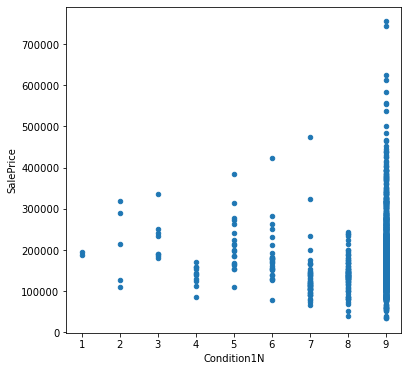

In [59]:
corr_features.plot(kind='scatter', x='Condition1N', y='SalePrice', figsize=(6,6))

_**SCATTER PLOT (SalePrice Vs YearBuilt)**_

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

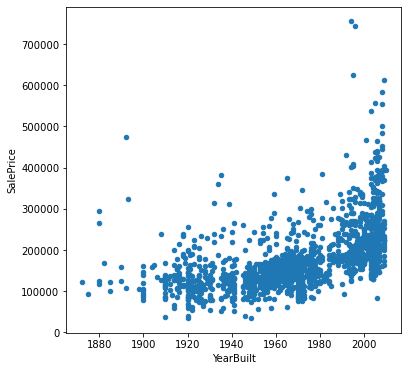

In [60]:
corr_features.plot(kind='scatter', x='YearBuilt', y='SalePrice', figsize=(6,6))

_**SCATTER PLOT (SalePrice Vs OverallQual)**_

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

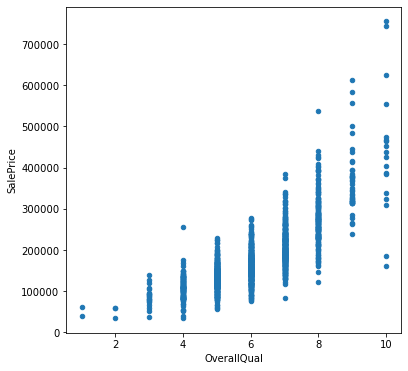

In [61]:
corr_features.plot(kind='scatter', x='OverallQual', y='SalePrice', figsize=(6,6))

_**SCATTER PLOT (SalePrice Vs LotArea)**_

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

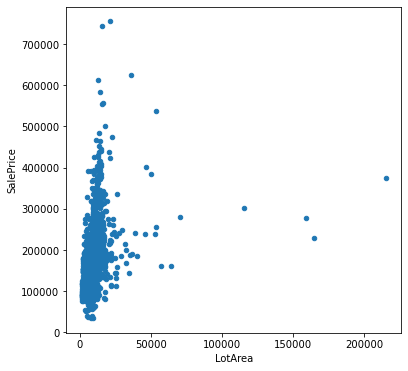

In [62]:
corr_features.plot(kind='scatter', x='LotArea', y='SalePrice', figsize=(6,6))

_**SCATTER PLOT (SalePrice Vs GarageCars)**_

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

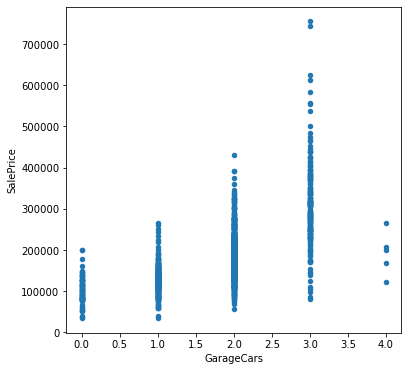

In [63]:
corr_features.plot(kind='scatter', x='GarageCars', y='SalePrice', figsize=(6,6))

_**SCATTER PLOT (SalePrice Vs TotalFullbath)**_

<AxesSubplot:xlabel='TotalFullbath', ylabel='SalePrice'>

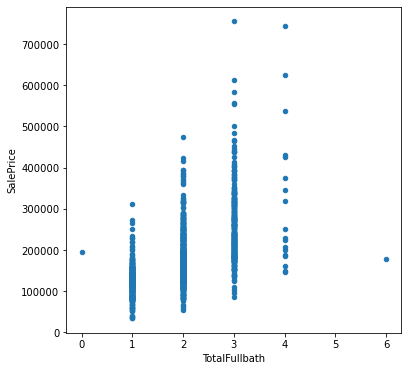

In [64]:
corr_features.plot(kind='scatter', x='TotalFullbath', y='SalePrice', figsize=(6,6))

_**SCATTER PLOT (SalePrice Vs SalePrice )**_

<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>

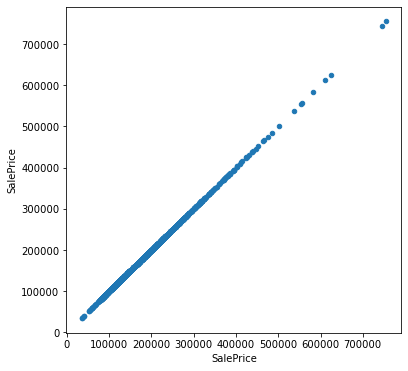

In [65]:
corr_features.plot(kind='scatter', x='SalePrice', y='SalePrice', figsize=(6,6))

After this correlation analisys, we can add a third group of feature called:
**_corr_features_** (compoused by 5 columns):
* 1stFlrSF: First Floor square feet
* YearBuilt: Original construction date
* OverallQual: Overall material and finish quality
* TotalFullbath
* GarageCars

In [66]:
corr_features_names = ['1stFlrSF','YearBuilt','OverallQual','TotalFullbath','GarageCars']
corr_features = home_dataF[corr_features_names]
corr_features

,1stFlrSF,YearBuilt,OverallQual,TotalFullbath,GarageCars
0,856,2003,7,3,2
1,1262,1976,6,2,2
2,920,2001,7,3,2
3,961,1915,7,2,3
4,1145,2000,8,3,3
...,...,...,...,...,...
1455,953,1999,6,2,2
1456,2073,1978,6,3,2
1457,1188,1941,7,2,1
1458,1078,1950,5,2,1


so, we will evaluate how perform the three gruops of features:
* central_features
* combined_features
* corr_features   

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### G- Building the prediction Model:

### G.1 - Data selection:

#### G.1.1 - Data for Modeling:

The data set used, was taken from Kaggle's Housing Prices Competition (Visit Kaggle). It has 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. The objective is to predict the final price of each home.

The excel file provided was _**train.csv**_, which was imported as the Data Frame: _**home_data**_.

Then, after column wrangling and ordinal encoding we created  _**home_dataF**_, which has two aditional columns: 
* TotalFullbath, which is the sum of _**BsmtFullBath**_ and _**FullBath**_.
* and, Condition1N, which is the manual encoded version of Condition1.

#### G.1.2 - Prediction Target:

The objective is to predict the final price of each home, which is the column: _**SalePrice**_.

In [67]:
y = home_dataF['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

#### G.1.3 - Choosing of the Features:

The full document so far has focused on determining the best Features to feed the model. We defined three groups: **central_features, combined_features and corr_features**, which we are going to be called now on as **X1, X2, and X3.**

In [68]:
central_features_names = ['1stFlrSF','2ndFlrSF','Condition1N','YearBuilt','OverallQual']
central_features = home_dataF[central_features_names]
central_features

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual
0,856,854,9,2003,7
1,1262,0,8,1976,6
2,920,866,9,2001,7
3,961,756,9,1915,7
4,1145,1053,9,2000,8
...,...,...,...,...,...
1455,953,694,9,1999,6
1456,2073,0,9,1978,6
1457,1188,1152,9,1941,7
1458,1078,0,9,1950,5


In [69]:
X1 = central_features
X1.describe()

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,8.667808,1971.267808,6.099315
std,386.587738,436.528436,1.042578,30.202904,1.382997
min,334.000000,0.000000,1.000000,1872.000000,1.000000
25%,882.000000,0.000000,9.000000,1954.000000,5.000000
50%,1087.000000,0.000000,9.000000,1973.000000,6.000000
75%,1391.250000,728.000000,9.000000,2000.000000,7.000000
max,4692.000000,2065.000000,9.000000,2010.000000,10.000000


* Now, **combined_features:**

In [70]:
combined_features_names = ['1stFlrSF','2ndFlrSF','Condition1N','YearBuilt','OverallQual','LotArea','GarageCars', 'TotalFullbath']
combined_features = home_dataF[combined_features_names]
combined_features

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual,LotArea,GarageCars,TotalFullbath
0,856,854,9,2003,7,8450,2,3
1,1262,0,8,1976,6,9600,2,2
2,920,866,9,2001,7,11250,2,3
3,961,756,9,1915,7,9550,3,2
4,1145,1053,9,2000,8,14260,3,3
...,...,...,...,...,...,...,...,...
1455,953,694,9,1999,6,7917,2,2
1456,2073,0,9,1978,6,13175,2,3
1457,1188,1152,9,1941,7,9042,1,2
1458,1078,0,9,1950,5,9717,1,2


In [71]:
X2 = combined_features
X2.describe()

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual,LotArea,GarageCars,TotalFullbath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,8.667808,1971.267808,6.099315,10516.828082,1.767123,1.990411
std,386.587738,436.528436,1.042578,30.202904,1.382997,9981.264932,0.747315,0.732046
min,334.000000,0.000000,1.000000,1872.000000,1.000000,1300.000000,0.000000,0.000000
25%,882.000000,0.000000,9.000000,1954.000000,5.000000,7553.500000,1.000000,1.000000
50%,1087.000000,0.000000,9.000000,1973.000000,6.000000,9478.500000,2.000000,2.000000
75%,1391.250000,728.000000,9.000000,2000.000000,7.000000,11601.500000,2.000000,2.000000
max,4692.000000,2065.000000,9.000000,2010.000000,10.000000,215245.000000,4.000000,6.000000


* Now, **corr_features**:

In [72]:
corr_features_names = ['1stFlrSF','YearBuilt','OverallQual','TotalFullbath','GarageCars']
corr_features = home_dataF[corr_features_names]
corr_features

,1stFlrSF,YearBuilt,OverallQual,TotalFullbath,GarageCars
0,856,2003,7,3,2
1,1262,1976,6,2,2
2,920,2001,7,3,2
3,961,1915,7,2,3
4,1145,2000,8,3,3
...,...,...,...,...,...
1455,953,1999,6,2,2
1456,2073,1978,6,3,2
1457,1188,1941,7,2,1
1458,1078,1950,5,2,1


In [73]:
X3 = corr_features
X3.describe()

,1stFlrSF,YearBuilt,OverallQual,TotalFullbath,GarageCars
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,1971.267808,6.099315,1.990411,1.767123
std,386.587738,30.202904,1.382997,0.732046,0.747315
min,334.000000,1872.000000,1.000000,0.000000,0.000000
25%,882.000000,1954.000000,5.000000,1.000000,1.000000
50%,1087.000000,1973.000000,6.000000,2.000000,2.000000
75%,1391.250000,2000.000000,7.000000,2.000000,2.000000
max,4692.000000,2010.000000,10.000000,6.000000,4.000000


#### G.2 - Building of the Model

#### G.2.1. - Type of model:

Let's use a simple algorithm (DecisionTreeRegressor) so that we see the evolution in the precision of the model as we change the model.

In [74]:
from sklearn.tree import DecisionTreeRegressor
# Define model
melbourne_model = DecisionTreeRegressor()

<img src="https://www.researchgate.net/profile/Wanli-Xing/publication/323784695/figure/fig3/AS:613990283624457@1523398099887/Decision-tree-with-six-dimensional-feature-space-and-two-classes-The-X-i-are-the.png"
    style="width:800px; float: center; margin: 0 40px 40px 40px;"></img>

#### G.2.2. - Fitting the models:

Now, For fitting the models, let's divide **X1, X2 and X3** in training and evaluation data to avoid 'In-sample scores', in a proporcion 80%-20%:

In [75]:
from sklearn.model_selection import train_test_split

For **X1**:

In [76]:
train_X1, val_X1, train_y1, val_y1 = train_test_split(X1, y, train_size=0.8, test_size=0.2, random_state=0)

In [77]:
train_X1.shape

(1168, 5)

In [78]:
val_X1.shape

(292, 5)

In [79]:
train_y1.shape

(1168,)

In [80]:
val_y1.shape

(292,)

In [81]:
train_X1.describe()

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,1160.958904,351.479452,8.673801,1970.890411,6.086473
std,373.315037,438.137938,1.062212,30.407486,1.367472
min,334.000000,0.000000,1.000000,1872.000000,1.000000
25%,884.000000,0.000000,9.000000,1953.750000,5.000000
50%,1092.000000,0.000000,9.000000,1972.000000,6.000000
75%,1389.250000,729.000000,9.000000,2000.000000,7.000000
max,3228.000000,1872.000000,9.000000,2010.000000,10.000000


For **X2**:

In [82]:
train_X2, val_X2, train_y2, val_y2 = train_test_split(X2, y, train_size=0.8, test_size=0.2, random_state=0)

In [83]:
train_X2.shape

(1168, 8)

In [84]:
val_X2.shape

(292, 8)

In [85]:
train_y2.shape

(1168,)

In [86]:
val_y2.shape

(292,)

In [87]:
train_X2.describe()

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual,LotArea,GarageCars,TotalFullbath
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.00000
mean,1160.958904,351.479452,8.673801,1970.890411,6.086473,10589.672945,1.771404,1.98887
std,373.315037,438.137938,1.062212,30.407486,1.367472,10704.180793,0.730041,0.72939
min,334.000000,0.000000,1.000000,1872.000000,1.000000,1300.000000,0.000000,1.00000
25%,884.000000,0.000000,9.000000,1953.750000,5.000000,7589.500000,1.000000,1.00000
50%,1092.000000,0.000000,9.000000,1972.000000,6.000000,9512.500000,2.000000,2.00000
75%,1389.250000,729.000000,9.000000,2000.000000,7.000000,11601.500000,2.000000,2.00000
max,3228.000000,1872.000000,9.000000,2010.000000,10.000000,215245.000000,4.000000,6.00000


For **X3**:

In [88]:
train_X3, val_X3, train_y3, val_y3 = train_test_split(X3, y, train_size=0.8, test_size=0.2, random_state=0)

In [89]:
train_X3.shape

(1168, 5)

In [90]:
val_X3.shape

(292, 5)

In [91]:
train_y3.shape

(1168,)

In [92]:
val_y3.shape

(292,)

In [93]:
train_X3.describe()

,1stFlrSF,YearBuilt,OverallQual,TotalFullbath,GarageCars
count,1168.000000,1168.000000,1168.000000,1168.00000,1168.000000
mean,1160.958904,1970.890411,6.086473,1.98887,1.771404
std,373.315037,30.407486,1.367472,0.72939,0.730041
min,334.000000,1872.000000,1.000000,1.00000,0.000000
25%,884.000000,1953.750000,5.000000,1.00000,1.000000
50%,1092.000000,1972.000000,6.000000,2.00000,2.000000
75%,1389.250000,2000.000000,7.000000,2.00000,2.000000
max,3228.000000,2010.000000,10.000000,6.00000,4.000000


### Now, it's time to fit each model:

In [94]:
model_1=melbourne_model.fit(train_X1, train_y1)

In [95]:
model_2=melbourne_model.fit(train_X2, train_y2)

In [96]:
model_3=melbourne_model.fit(train_X3, train_y3)

#### G.2.3. - Predictions with models:

Now, Let's get the 'predicted prices' for each model with the validation data.

For  _**model_1**_:

In [97]:
val_predictions1 = model_1.predict(val_X1)
val_predictions1

array([325000., 140000., 475000., 475000., 475000., 475000., 214500.,
       475000., 611657., 475000., 475000., 424870., 475000., 475000.,
       320000., 475000., 475000., 475000., 475000., 475000., 140000.,
       475000.,  95000., 475000., 475000., 140000., 475000., 475000.,
       325000., 475000., 325000., 475000., 475000., 475000., 325000.,
       475000., 325000., 475000., 475000., 475000., 325000., 475000.,
       475000., 325000., 475000., 325000., 424870., 475000., 475000.,
       475000., 325000., 475000., 475000., 424870., 325000., 475000.,
       475000., 475000., 424870., 475000., 424870., 475000., 475000.,
       475000., 325000., 475000., 475000., 475000., 475000., 475000.,
       475000., 320000., 475000., 475000., 475000., 325000., 475000.,
       239000., 475000., 475000., 475000., 475000., 475000., 475000.,
       325000., 475000., 144000., 475000., 475000., 475000., 475000.,
       475000., 475000., 475000., 475000., 475000., 475000., 475000.,
       475000., 4750

In [98]:
val_predictions1.shape

(292,)

In [99]:
val_predictions1.mean()

424499.37328767125

For  _**model_3**_:

In [100]:
val_predictions3 = model_3.predict(val_X3)
val_predictions3

array([223000.        , 132000.        , 142125.        , 190000.        ,
        84500.        , 127000.        , 315000.        , 105000.        ,
       625000.        , 147517.33333333, 181134.        , 135000.        ,
       230000.        , 138500.        , 154500.        , 153000.        ,
       236000.        ,  94750.        , 147500.        , 140000.        ,
       124500.        , 145575.        , 129900.        , 185000.        ,
       187500.        , 220000.        , 177000.        ,  97000.        ,
       328900.        , 107500.        , 155000.        , 236000.        ,
       147000.        , 354000.        , 253293.        , 189000.        ,
       325000.        , 142500.        , 219500.        , 212000.        ,
       167000.        , 168000.        , 200141.        , 319000.        ,
       305000.        , 141000.        , 115000.        , 138500.        ,
       147000.        , 111000.        , 325000.        , 146000.        ,
       112000.        ,  

In [101]:
val_predictions3.shape

(292,)

In [102]:
val_predictions3.mean()

185291.3093607306

For  _**model_2**_:

In [103]:
melbourne_model = DecisionTreeRegressor()
model_2=melbourne_model.fit(train_X2, train_y2)
val_predictions2 = model_2.predict(val_X2)
val_predictions2

array([257500., 140200., 119000., 205000.,  87450.,  91500., 295493.,
       109000., 755000., 180000., 171750., 218000., 250000., 144000.,
        67000., 153000., 236000.,  93500., 148000., 116900., 140000.,
       149000., 129900., 185000., 207500., 227000., 177000.,  86000.,
       337500., 119000., 160000., 194500., 107000., 309000., 253293.,
       274725., 285000., 133000., 222500., 315000., 150900., 153000.,
       185500., 319000., 310000., 136500., 115000., 144000., 187000.,
        83000., 582933., 146000., 165000.,  35311., 225000., 120500.,
       110000., 252000., 140000., 124900., 160000., 136500., 147500.,
       148000., 193000., 176500., 112500., 201800.,  73000., 201800.,
       180000.,  67000., 128000., 225000., 135750., 250000., 137000.,
        96500., 280000.,  60000., 135000., 130000., 154900., 122000.,
       225000., 185850.,  87000., 202500., 176432., 142125., 216500.,
       231500., 185000., 230000., 159895., 147500., 226000., 224000.,
       120500., 1415

In [104]:
val_predictions2.shape

(292,)

In [105]:
val_predictions2.mean()

185741.3698630137

We can see that models 2 and 3 have a similar mean prediction, around 183.000-184.000. But model 1 had very high values, around 447000. Let's evaluate the models to determine which one does better:

#### G.2.1. - Evaluation of the models:

Let's do the evaluation with the MAE(mean absolute error):

In [106]:
from sklearn.metrics import mean_absolute_error

In [107]:
MAE1 = mean_absolute_error(val_y1, val_predictions1)
MAE1

254995.32534246575

In [108]:
MAE2 = mean_absolute_error(val_y2, val_predictions2)
MAE2

30411.739726027397

In [109]:
MAE3 = mean_absolute_error(val_y3, val_predictions3)
MAE3

31932.279680365296

### CONCLUSIONS:

The models that performed better in this exercise, where: 
   * X2 (combined_features). It took the 8 columms that based on intuition we consider would affect the most the model
   * X3 (corr_features). The feaures selected based on the correlation with SalePrice.  
   
Simultaneously, model 1 performs way worst than the other, though the features taken were almost the same as model 2. The reason for this performance can be related to the kind of info used to fit the model. Probably, the info was right skew, and then the results were always too high.

The model that performed the best was model 2, giving us a MAE of 28960.67(dollars).  The Mean price of sales is 180921(dollars), hence the error of hour model is in around 17%, which is too high. We have to find the way to optimize even more the model.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## 2- MODEL OPTIMIZATION

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### A- Determination of optimal tree's depth in Decision tree.

As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. The rule followed is: (2)*n= X, where n is the depth of the tree and X is the number of leaves at the bottom.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses). This is a phenomenon called **overfitting**. 

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the perfect spot between underfitting and overfitting. Visually, we want the low point of the (orange) validation curve in the figure below.

<img src="https://vitalflux.com/wp-content/uploads/2020/12/overfitting-and-underfitting-wrt-model-error-vs-complexity.png"
    style="width:600px; float: center; margin: 0 40px 40px 40px;"></img>

For this purpose, let's build a function that allow us to built models taking as argument leaf_nodes for the model X2:

In [110]:
def get_mae(max_leaf_nodes):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X2, train_y2)
    preds_val = model.predict(val_X2)
    mae = mean_absolute_error(val_y2, preds_val)
    return(mae)

Let's do a quick test of the **get_mae** function:

In [111]:
get_mae(2)

44996.39804393829

In [112]:
get_mae(20)

28301.411692836544

In [113]:
get_mae(200)

28112.112673139316

In [114]:
get_mae(2000)

29690.18493150685

In [115]:
get_mae(400)

28405.7699079137

Expressing the content above as a function:

In [116]:
for max_leaf_nodes in [2, 20, 200, 400, 2000]:
    my_mae = get_mae(max_leaf_nodes)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 2  		 Mean Absolute Error:  44996
Max leaf nodes: 20  		 Mean Absolute Error:  28301
Max leaf nodes: 200  		 Mean Absolute Error:  28112
Max leaf nodes: 400  		 Mean Absolute Error:  28405
Max leaf nodes: 2000  		 Mean Absolute Error:  29690


As we can see, somewhere between 20 and 400 leaves give us the minimun MAE. Let's build a function to find the number of leaves to have the minimum MAE

In [117]:
def minimums(get_mae, leaf_nodes):
    leaf_nodes = 20
    maes = {}
    while leaf_nodes<400:
        my_mae = get_mae(leaf_nodes)        
        maes.update({leaf_nodes: my_mae})
        leaf_nodes = leaf_nodes+1
    maes_dict = maes
    val = maes_dict.values()
    minval = min(val)
    for i in maes_dict:
        if maes_dict[i]== minval:
            print("Leaf nodes for minimun MAE: %d" %(i))
    return maes_dict

In [118]:
minimums(get_mae, 20)

Leaf nodes for minimun MAE: 74
Leaf nodes for minimun MAE: 75


{20: 28301.411692836544,
 21: 27665.751731331784,
 22: 27464.490886582927,
 23: 27912.308645878427,
 24: 27516.04455087589,
 25: 27266.41506620531,
 26: 27512.731130547825,
 27: 27672.47466175026,
 28: 27768.1888931049,
 29: 27909.953080971827,
 30: 27768.591019633852,
 31: 27553.02027486925,
 32: 27490.45927419093,
 33: 27032.058298080814,
 34: 26714.88016789162,
 35: 26852.818157128408,
 36: 27385.865645712885,
 37: 27487.69612516494,
 38: 27142.60639502384,
 39: 26825.440789349203,
 40: 26721.32969190716,
 41: 26504.53249628473,
 42: 26361.042998567835,
 43: 26193.96200576716,
 44: 26248.474459067285,
 45: 26500.2447118675,
 46: 26401.22471274562,
 47: 26521.01029113223,
 48: 26588.40613805547,
 49: 26646.65850269996,
 50: 26662.312378198487,
 51: 26669.40368414783,
 52: 26955.36258825742,
 53: 26955.36258825742,
 54: 26996.278250506133,
 55: 26944.791949136266,
 56: 26790.09342277678,
 57: 26813.447423228386,
 58: 26590.844683502357,
 59: 26436.735094461263,
 60: 26140.193998570852

As we can see, the number of Leaf nodes for getting the minimun MAE: 74-75, which gives us a mae of: 

In [119]:
get_mae(74)

24774.743398017068

In [120]:
get_mae(75)

24774.743398017068

The Mean price of sales is 180921(dollars), the optimized model gives us a MAE of 24775(dollars),  Around 13.69% error.

Let's find the minimun value for the **X1** and **X3** groups of features:

In [121]:
def get_mae1(max_leaf_nodes1):
    model1 = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes1, random_state=0)
    model1.fit(train_X1, train_y1)
    preds_val1 = model1.predict(val_X1)
    mae1 = mean_absolute_error(val_y1, preds_val1)
    return(mae1)

Let's do a quick test of the **get_mae1** function:

In [122]:
get_mae1(2)

44996.39804393829

In [123]:
get_mae1(20)

24199.85082266677

In [124]:
get_mae1(200)

25831.53690060803

In [125]:
get_mae1(2000)

28650.58219178082

As we can see, somewhere between 20 and 200 leaves give us the minimun MAE1. Let's build a function to find the number of leaves to have the minimum MAE1:

In [126]:
def minimums1(get_mae1, leaf_nodes1):
    leaf_nodes1 = 20
    maes1 = {}
    while leaf_nodes1<200:
        my_mae1 = get_mae1(leaf_nodes1)        
        maes1.update({leaf_nodes1: my_mae1})
        leaf_nodes1 = leaf_nodes1+1
    maes_dict1 = maes1
    val1 = maes_dict1.values()
    minval1 = min(val1)
    for i in maes_dict1:
        if maes_dict1[i]== minval1:
            print("Leaf nodes for minimun MAE: %d" %(i))
    return maes_dict1

In [127]:
minimums1(get_mae1, 20)

Leaf nodes for minimun MAE: 80


{20: 24199.85082266677,
 21: 24647.668581962265,
 22: 24665.831998154146,
 23: 24760.15017043537,
 24: 24595.51906648694,
 25: 24991.629893009333,
 26: 24960.469447803855,
 27: 24775.124503574563,
 28: 25003.30946348788,
 29: 24958.92332094272,
 30: 24816.533749956827,
 31: 24819.951558176002,
 32: 24921.782037628058,
 33: 24907.116564402655,
 34: 24626.26839088667,
 35: 24294.813767599,
 36: 24325.75521828153,
 37: 24239.043521996206,
 38: 24095.55402427931,
 39: 24181.79686867457,
 40: 24468.43258231742,
 41: 24439.585748625905,
 42: 24410.792697164525,
 43: 24530.578275551128,
 44: 24667.472777073195,
 45: 24894.057708580047,
 46: 24894.057708580047,
 47: 25220.63692631617,
 48: 24991.890840210493,
 49: 24991.890840210493,
 50: 25063.711072752612,
 51: 24890.18481704485,
 52: 24969.263584168137,
 53: 24938.207388651328,
 54: 24910.770027148505,
 55: 24561.451748038915,
 56: 24839.393001990444,
 57: 24685.28341294935,
 58: 24646.99218378834,
 59: 24554.389280983385,
 60: 24670.608281

As we can see, the number of Leaf nodes for getting the minimun **MAE1** is 80, which gives us a mae of: 

In [128]:
get_mae1(80)

23551.371234987982

The Mean price of sales is 180921(dollars), the optimized model gives us a MAE of 23552(dollars),  Around 13% error.

Let's find the minimun value for the **X3**:

In [129]:
def get_mae3(max_leaf_nodes3):
    model3 = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes3, random_state=0)
    model3.fit(train_X3, train_y3)
    preds_val3 = model3.predict(val_X3)
    mae3 = mean_absolute_error(val_y3, preds_val3)
    return(mae3)

Let's do a quick test of the **get_mae3** function:

In [130]:
get_mae3(2)

44996.39804393829

In [131]:
get_mae3(20)

28992.83032283407

In [132]:
get_mae3(200)

30681.33477693426

In [133]:
get_mae3(2000)

31491.707762557075

As we can see, somewhere between 20 and 200 leaves give us the minimun MAE3. Let's build a function to find the number of leaves to have the minimum MAE3:

In [134]:
def minimums3(get_mae3, leaf_nodes3):
    leaf_nodes3 = 20
    maes3 = {}
    while leaf_nodes3<200:
        my_mae3 = get_mae3(leaf_nodes3)        
        maes3.update({leaf_nodes3: my_mae3})
        leaf_nodes3 = leaf_nodes3+1
    maes_dict3 = maes3
    val3 = maes_dict3.values()
    minval3 = min(val3)
    for i in maes_dict3:
        if maes_dict3[i]== minval3:
            print("Leaf nodes for minimun MAE: %d" %(i))
    return maes_dict3

In [135]:
minimums1(get_mae3, 20)

Leaf nodes for minimun MAE: 30


{20: 28992.83032283407,
 21: 28357.170361329318,
 22: 27960.90626632678,
 23: 28544.870062804275,
 24: 28295.240578133697,
 25: 28400.43663324536,
 26: 28696.294935469836,
 27: 28348.150990196875,
 28: 28101.60319881208,
 29: 28026.069380230576,
 30: 27708.89125004138,
 31: 27897.47246648899,
 32: 28035.41045572578,
 33: 28568.457944310256,
 34: 28470.990009464356,
 35: 28572.82048891641,
 36: 28624.240694395867,
 37: 28564.619053639894,
 38: 28619.012217048006,
 39: 28198.94197782809,
 40: 28085.988479321695,
 41: 28337.758732121918,
 42: 28337.758732121918,
 43: 28457.544310508518,
 44: 28594.438812030592,
 45: 28601.530117979935,
 46: 28887.489022089525,
 47: 28869.133833150212,
 48: 28869.133833150212,
 49: 28869.133833150212,
 50: 29314.339312602267,
 51: 29091.73657287624,
 52: 29086.531393081714,
 53: 29053.489992777308,
 54: 29087.122068507088,
 55: 29202.55063993566,
 56: 29585.630874769315,
 57: 29526.105411433302,
 58: 29442.899646593116,
 59: 29474.578489819913,
 60: 29440.

As we can see, the number of Leaf nodes for getting the minimun **MAE3** is 30, which gives us a mae of:

In [136]:
get_mae3(30)

27708.89125004138

The Mean price of sales is 180921(dollars), the optimized model3 gives us a MAE of 27708(dollars),  Around 15% error.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### B- Using Random Forest model.

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. Let's test this model for each group of features:

<img src="https://www.researchgate.net/profile/Fahimeh-Mirchooli/publication/343886855/figure/fig5/AS:928777047654401@1598449112454/The-general-framework-of-the-random-forest-RF-approach.jpg"
    style="width:600px; float: center; margin: 0 40px 40px 40px;"></img>

For  **X1**: 

In [137]:
from sklearn.ensemble import RandomForestRegressor

forest_model1 = RandomForestRegressor(random_state=1)
forest_model1.fit(train_X1, train_y1)
melb_preds1 = forest_model1.predict(val_X1)
print(mean_absolute_error(val_y1, melb_preds1))

21838.695073793217


For  **X2**: 

In [138]:
forest_model2 = RandomForestRegressor(random_state=1)
forest_model2.fit(train_X2, train_y2)
melb_preds2 = forest_model2.predict(val_X2)
print(mean_absolute_error(val_y2, melb_preds2))

20613.45164155251


For  **X3**: 

In [139]:
forest_model3 = RandomForestRegressor(random_state=1)
forest_model3.fit(train_X3, train_y3)
melb_preds3 = forest_model3.predict(val_X3)
print(mean_absolute_error(val_y3, melb_preds3))

25524.213599641225


Now, let's build a function that allow us to optimize the number of leaf_tree to get the minumin MAE.

Let's start with  **X1**:

In [140]:
def get_RFmae1(max_leaf_nodes1):
    RFmodel1 = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes1, random_state=0)
    RFmodel1.fit(train_X1, train_y1)
    RFpreds_val1 = RFmodel1.predict(val_X1)
    RFmae1 = mean_absolute_error(val_y1, RFpreds_val1)
    return(RFmae1)

Let's do a quick test of the **get_RFmae1** function:

In [141]:
get_RFmae1(2)

41186.874066542616

In [142]:
get_RFmae1(20)

23028.652736390468

In [143]:
get_RFmae1(100)

20818.35276487528

In [144]:
get_RFmae1(200)

21200.440748082416

In [145]:
get_RFmae1(300)

21459.009990596882

In [146]:
get_RFmae1(500)

21603.150548100464

As we can see, somewhere between 20 and 200 leaves give us the minimun RFmae1. Let's build a function to find the number of leaves to have the minimum **RFmae1**:

In [147]:
def RFminimums1(get_RFmae1, RFleaf_nodes1):
    RFleaf_nodes1 = 20
    RFmaes1 = {}
    while RFleaf_nodes1<200:
        my_RFmae1 = get_RFmae1(RFleaf_nodes1)        
        RFmaes1.update({RFleaf_nodes1: my_RFmae1})
        RFleaf_nodes1 = RFleaf_nodes1+1
    RFmaes_dict1 = RFmaes1
    RFval1 = RFmaes_dict1.values()
    RFminval1 = min(RFval1)
    for i in RFmaes_dict1:
        if RFmaes_dict1[i]== RFminval1:
            print("Leaf nodes for minimun MAE: %d" %(i))
    return RFmaes_dict1

In [148]:
RFminimums1(get_RFmae1, 20)

Leaf nodes for minimun MAE: 89


{20: 23028.652736390468,
 21: 22934.077675888762,
 22: 22793.54732420867,
 23: 22657.35734511727,
 24: 22545.81300512677,
 25: 22425.984656500572,
 26: 22359.39055722299,
 27: 22251.854702068482,
 28: 22130.713507331468,
 29: 22065.637858576105,
 30: 21984.429127521333,
 31: 21935.72425746137,
 32: 21858.87287437757,
 33: 21762.673776479045,
 34: 21720.350937663545,
 35: 21703.42196141039,
 36: 21679.06566610753,
 37: 21631.97892759045,
 38: 21569.934320481487,
 39: 21509.695037130576,
 40: 21474.60290529229,
 41: 21472.15735347621,
 42: 21401.23450170842,
 43: 21370.576382950945,
 44: 21342.618338587967,
 45: 21314.003121077694,
 46: 21290.22745427205,
 47: 21261.23450613468,
 48: 21248.752941341707,
 49: 21225.78355563408,
 50: 21207.906707420014,
 51: 21165.637578732105,
 52: 21140.962438379785,
 53: 21129.077413232226,
 54: 21107.740821256393,
 55: 21087.507783957277,
 56: 21070.725878395242,
 57: 21032.700356124926,
 58: 21046.479561772627,
 59: 21031.615195283863,
 60: 21025.4845

As we can see, the number of Leaf nodes for getting the minimun **RFmae1** is 89, which gives us a mae of:

In [149]:
get_RFmae1(89)

20787.28957259479

The Mean price of sales is 180921(dollars), the optimized RFmodel1 gives us a MAE of 20787(dollars),  Around 11.50% error.

Now, let's do  **X2**:

In [150]:
def get_RFmae2(max_leaf_nodes2):
    RFmodel2 = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes2, random_state=0)
    RFmodel2.fit(train_X2, train_y2)
    RFpreds_val2 = RFmodel2.predict(val_X2)
    RFmae2 = mean_absolute_error(val_y2, RFpreds_val2)
    return(RFmae2)

Let's do a quick test of the **get_RFmae2** function:

In [151]:
get_RFmae2(2)

41186.874066542616

In [152]:
get_RFmae2(20)

23657.365338668784

In [153]:
get_RFmae2(100)

20940.775941542288

In [154]:
get_RFmae2(200)

20671.729832291672

In [155]:
get_RFmae2(300)

20663.478063154416

In [156]:
get_RFmae2(500)

20575.277882849656

In [157]:
get_RFmae2(2000)

20573.973221624263

In [158]:
get_RFmae2(10000)

20573.973221624263

In [159]:
get_RFmae2(10000000)

20573.973221624263

For some reason, with the random forest model in X2, the model reaches a minimun value from 2000 tree_leaves ahead.

The Mean price of sales is 180921(dollars), the optimized RFmodel2 gives us a MAE of 20573(dollars),  Around 11.37% error.

Now, let's do  **X3**:

In [160]:
def get_RFmae3(max_leaf_nodes3):
    RFmodel3 = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes3, random_state=0)
    RFmodel3.fit(train_X3, train_y3)
    RFpreds_val3 = RFmodel3.predict(val_X3)
    RFmae3 = mean_absolute_error(val_y3, RFpreds_val3)
    return(RFmae3)

Let's do a quick test of the **get_RFmae3** function:

In [161]:
get_RFmae3(2)

41186.874066542616

In [162]:
get_RFmae3(20)

25800.045310092184

In [163]:
get_RFmae3(100)

25379.147806943543

In [164]:
get_RFmae3(200)

25258.531474093375

In [165]:
get_RFmae3(300)

25396.28203800319

In [166]:
get_RFmae3(500)

25534.12708144502

In [167]:
get_RFmae3(2000)

25562.75156735159

As we can see, somewhere between 100 and 200 leaves give us the minimun RFmae1. Let's build a function to find the number of leaves to have the minimum **RFmae3**:

In [168]:
def RFminimums3(get_RFmae3, RFleaf_nodes3):
    RFleaf_nodes3 = 100
    RFmaes3 = {}
    while RFleaf_nodes3<200:
        my_RFmae3 = get_RFmae3(RFleaf_nodes3)        
        RFmaes3.update({RFleaf_nodes3: my_RFmae3})
        RFleaf_nodes3 = RFleaf_nodes3+1
    RFmaes_dict3 = RFmaes3
    RFval3 = RFmaes_dict3.values()
    RFminval3 = min(RFval3)
    for i in RFmaes_dict3:
        if RFmaes_dict3[i]== RFminval3:
            print("Leaf nodes for minimun MAE: %d" %(i))
    return RFmaes_dict3

In [169]:
RFminimums3(get_RFmae3, 100)

Leaf nodes for minimun MAE: 156


{100: 25379.147806943543,
 101: 25387.944494461626,
 102: 25402.53640655972,
 103: 25397.057989667926,
 104: 25400.545221277836,
 105: 25386.277353888338,
 106: 25375.67857529941,
 107: 25352.91934164394,
 108: 25343.7270729608,
 109: 25347.19616442033,
 110: 25336.185069105406,
 111: 25319.78342344352,
 112: 25327.763142080308,
 113: 25340.127012435878,
 114: 25335.038610867843,
 115: 25319.352267583276,
 116: 25313.031202986513,
 117: 25315.116800769247,
 118: 25331.707233469333,
 119: 25324.280396740814,
 120: 25317.036896169775,
 121: 25325.56675571459,
 122: 25301.906235434868,
 123: 25293.29776940168,
 124: 25298.74337019819,
 125: 25276.23813295451,
 126: 25280.03699749666,
 127: 25280.163581857025,
 128: 25283.83906743369,
 129: 25292.09657298257,
 130: 25280.359610601445,
 131: 25274.02309338287,
 132: 25269.071373506184,
 133: 25265.609168775445,
 134: 25260.726388319905,
 135: 25269.946377358276,
 136: 25266.59011420023,
 137: 25254.48561100865,
 138: 25266.3413469386,
 139:

As we can see, the number of Leaf nodes for getting the minimun **RFmae1** is 156, which gives us a mae of:

In [170]:
get_RFmae3(156)

25182.05079320351

The Mean price of sales is 180921(dollars), the optimized RFmodel1 gives us a MAE of 25182(dollars),  Around 13.91% error.

Now, let's analyse the result so far.

### CONCLUSIONS:
							
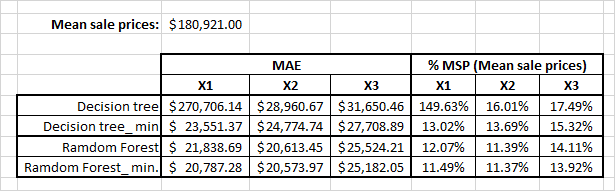

* Random forest perform better than decision tree
* The search for the Number of leave optimal for minimal MAE brought and improvement in 2 percentual points in the decision tree method, and around 1% in the random forest method.
* Features X2 are the ones that perform the best. X1 had extremely off results with the default option for decision tree, but it improved considerably after looking for the optimal number of leaves.
* So far, we have manage to optimize the model in 6 percentual points, moving from 17.49% to 11.37%.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### C- Using the ''Cross-Validation'' Method.

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds", Then we run one experiment for each fold.

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

So, given these tradeoffs, we should use this approach for small datasets, where extra computational burden isn't a big deal, you should run cross-validation.

<img src="https://www.dummies.com/wp-content/uploads/9781119245513-fg1104.jpg"
    style="width:600px; float: center; margin: 0 40px 40px 40px;"></img>

In [171]:
# Let's import the library:
from sklearn.model_selection import cross_val_score

Let's do the process for **X1**:

In [172]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores1 = -1 * cross_val_score(forest_model1, train_X1, train_y1,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("RF - ''Cross-Validation'' - MAE scores for X1:\n", scores1)
print("RF - ''Cross-Validation''-Average MAE score1 (across experiments):")
print(scores1.mean())

RF - ''Cross-Validation'' - MAE scores for X1:
 [21601.03205637 23651.87940944 22655.91485222 23724.2215747
 19714.76448275]
RF - ''Cross-Validation''-Average MAE score1 (across experiments):
22269.562475096893


Let's do the process for **X2**:

In [173]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores2 = -1 * cross_val_score(forest_model2, train_X2, train_y2,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("RF - ''Cross-Validation'' - MAE scores for X2:\n", scores2)
print("RF - ''Cross-Validation''-Average MAE score2 (across experiments):")
print(scores2.mean())

RF - ''Cross-Validation'' - MAE scores for X2:
 [19435.18473911 22466.3335641  20191.62123321 21658.50686287
 19211.28538627]
RF - ''Cross-Validation''-Average MAE score2 (across experiments):
20592.586357111588


Let's do the process for **X3**:

In [174]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores3 = -1 * cross_val_score(forest_model3, train_X3, train_y3,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("RF - ''Cross-Validation'' - MAE scores for X3:\n", scores3)
print("RF - ''Cross-Validation''-Average MAE score3 (across experiments):")
print(scores3.mean())

RF - ''Cross-Validation'' - MAE scores for X3:
 [22809.95526862 25618.91193205 25071.69685999 26611.01679389
 22169.64480217]
RF - ''Cross-Validation''-Average MAE score3 (across experiments):
24456.24513134343


* This cross validation method help us to confirm that in features **X2** performs in general terms better.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### D- Using the ''XGBoost'' Method.

Gradient boosting is a method that goes through cycles to iteratively add models into an ensemble.

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.)

Then, we start the cycle:

* First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we add the predictions from all models in the ensemble.
* These predictions are used to calculate a loss function (like mean squared error, for instance).
* Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss. (Side note: The "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model.)
* Finally, we add the new model to ensemble, and repeat.

<img src="https://www.researchgate.net/profile/Salih-Awadh/publication/344683182/figure/fig4/AS:949696809938952@1603436772830/Schematic-diagram-of-XGBoost-working-model-from-the-feature-input-regularization-loss.png"
    style="width:600px; float: center; margin: 0 40px 40px 40px;"></img>

In [175]:
#let's import the library
from xgboost import XGBRegressor

Let's do the process for **X1**:

In [176]:
#Parameters already Tuned
my_modelXG1 = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=3)
my_modelXG1.fit(train_X1, train_y1, 
             early_stopping_rounds=5, 
             eval_set=[(val_X1, val_y1)],
             verbose=False)
predictionsXG1 = my_modelXG1.predict(val_X1)
print("Mean Absolute Error: " + str(mean_absolute_error(predictionsXG1, val_y1)))

Mean Absolute Error: 19178.22588024401


Let's do the process for **X2**:

In [177]:
#Parameters already Tuned
my_modelXG2 = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=3)
my_modelXG2.fit(train_X2, train_y2, 
             early_stopping_rounds=5, 
             eval_set=[(val_X2, val_y2)],
             verbose=False)
predictionsXG2 = my_modelXG2.predict(val_X2)
print("Mean Absolute Error: " + str(mean_absolute_error(predictionsXG2, val_y2)))

Mean Absolute Error: 19557.393527932363


Let's do the process for **X3**:

In [178]:
#Parameters already Tuned
my_modelXG3 = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=3)
my_modelXG3.fit(train_X3, train_y3, 
             early_stopping_rounds=5, 
             eval_set=[(val_X3, val_y3)],
             verbose=False)
predictionsXG3 = my_modelXG3.predict(val_X3)
print("Mean Absolute Error: " + str(mean_absolute_error(predictionsXG3, val_y3)))

Mean Absolute Error: 24722.722468964042


### CONCLUSIONS:
								
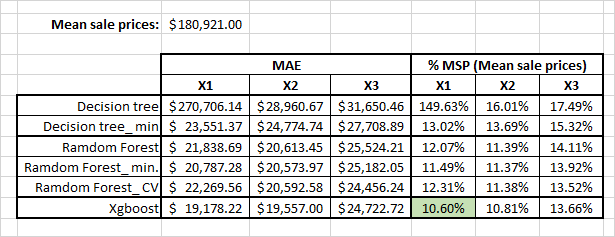

After building three different models, with three different sets of features, the group X1 and the XGboost provided the best result, a MAE of 19.178 dollar  (around 10.60% of the mean sale prices).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### E- Evaluation of possible ''Data Leakage''.

<img src="http://digital-thinking.de/wp-content/uploads/2020/03/DataLeakage.png"
    style="width:600px; float: center; margin: 0 40px 40px 40px;"></img>

Data leakage happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction. This leads to high performance on the training set (and possibly even the validation data), but the model will perform poorly in production. In other words, leakage causes a model to look accurate until you start making decisions with the model, and then the model becomes very inaccurate. There are two main types of leakage: **target leakage** and **train-test contamination**.

**Target leakage** occurs when your predictors include data that will not be available at the time you make predictions. It is important to think about target leakage in terms of the timing or chronological order that data becomes available, not merely whether a feature helps make good predictions.

A different type of leak occurs when you aren't careful to distinguish training data from validation data. 
Recall that validation is meant to be a measure of how the model does on data that it hasn't considered before. You can corrupt this process in subtle ways if the validation data affects the preprocessing behavior. This is sometimes called **train-test contamination**.

All models were fit with train data. In that sense we are sure we wont have problems with train-test contamination. Now, let's bring back the three groups of features we selected to inspect in detail if there is any posibility for Target leakage:

In [179]:
central_features

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual
0,856,854,9,2003,7
1,1262,0,8,1976,6
2,920,866,9,2001,7
3,961,756,9,1915,7
4,1145,1053,9,2000,8
...,...,...,...,...,...
1455,953,694,9,1999,6
1456,2073,0,9,1978,6
1457,1188,1152,9,1941,7
1458,1078,0,9,1950,5


In [180]:
combined_features

,1stFlrSF,2ndFlrSF,Condition1N,YearBuilt,OverallQual,LotArea,GarageCars,TotalFullbath
0,856,854,9,2003,7,8450,2,3
1,1262,0,8,1976,6,9600,2,2
2,920,866,9,2001,7,11250,2,3
3,961,756,9,1915,7,9550,3,2
4,1145,1053,9,2000,8,14260,3,3
...,...,...,...,...,...,...,...,...
1455,953,694,9,1999,6,7917,2,2
1456,2073,0,9,1978,6,13175,2,3
1457,1188,1152,9,1941,7,9042,1,2
1458,1078,0,9,1950,5,9717,1,2


In [181]:
corr_features

,1stFlrSF,YearBuilt,OverallQual,TotalFullbath,GarageCars
0,856,2003,7,3,2
1,1262,1976,6,2,2
2,920,2001,7,3,2
3,961,1915,7,2,3
4,1145,2000,8,3,3
...,...,...,...,...,...
1455,953,1999,6,2,2
1456,2073,1978,6,3,2
1457,1188,1941,7,2,1
1458,1078,1950,5,2,1


As we can see, none of the features in the tables are susceptible to **Target leakage**.